**Module Paths**

In [1]:
import os

os.chdir("../../")

# Putting everything together

Train the model and validate it against the validation set.

Let's start by defining a few hyperparameters

In [5]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
dropout = 0.5  # dropout for our model
learning_rate = 0.01  # Learning rate for SGD (or Adam)
opt = "sgd"  # optimizer. 'sgd' or 'adam'
weight_decay = 0.005  # regularization. Increase this to combat overfitting
momentum = 0.9

## Import necessary components

In [6]:
from cnn.landmark_classification.src.data import get_data_loaders
from cnn.landmark_classification.src.train import optimize
from cnn.landmark_classification.src.optimizer import get_optimizer, get_loss
from cnn.landmark_classification.src.model import MyModel

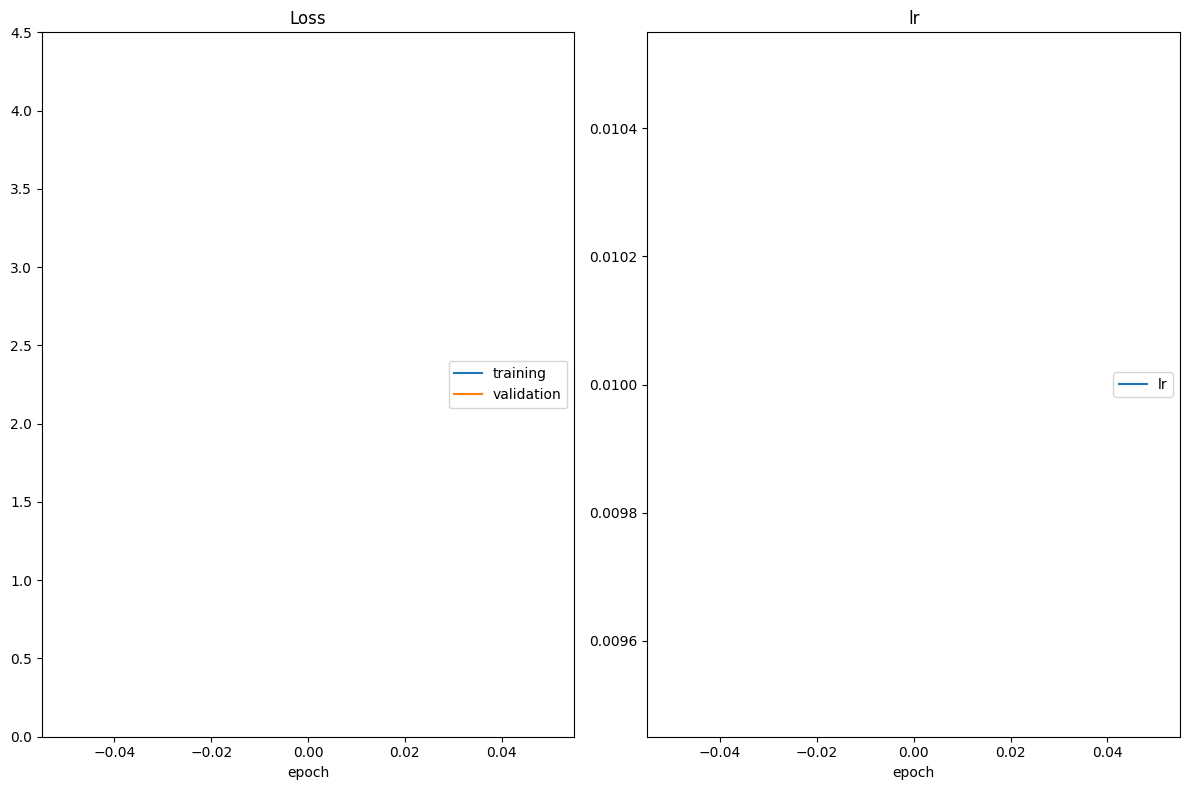

In [ ]:
# Set up data loaders using batch_size and valid_size defined above
data_loaders = get_data_loaders(batch_size=batch_size, valid_size=valid_size)

# Instantiate model with num_classes and dropout
model = MyModel(num_classes=num_classes, dropout=dropout)

# Get the optimizer with the specified model, learning rate, optimizer type, and weight decay
optimizer = get_optimizer(
    model,
    optimizer=opt,
    learning_rate=learning_rate,
    weight_decay=weight_decay,
    momentum=momentum,
)

# Get the loss function
loss = get_loss()

# Run the optimization process
optimize(
    data_loaders,
    model,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/best_val_loss.pt",
    interactive_tracking=True,
)

In [ ]:
model = MyModel(num_classes=num_classes, dropout=dropout)

# Load the weights from the checkpoint
model.load_state_dict(torch.load("checkpoints/best_val_loss.pt", weights_only=True))

# device
from utils.device import get_device

device = get_device()
model = model.to(device)

# Run test
one_epoch_test(data_loaders["test"], model, loss)